Install osmnx and shapely package if required

In [1]:
# uncomment below 2 lines to install osmnx and shapely package, if required 
#!conda install -c conda-forge osmnx
#!conda install -c conda-forge shapely

Import essential python packages

In [3]:
import json
import matplotlib.pyplot as plt
import os
import osmnx  as ox
import pandas as pd
import time
from   shapely.geometry import Polygon, shape

In [3]:
print("osmnx version:", ox.__version__)

osmnx version: 1.1.1


Supporting Function Definition

In [4]:
#
# Source: https://github.com/cyang-kth/fmm/blob/master/example/osmnx_example/download_network.ipynb
#
# Issue:      Below function has some issues when converting graph, G, to 
#             GeoPandas's GeoDataFrame to get a list of GeoDataFrame nodes and edges.
# Workaround: Comment out function call as it is not necessary at the moment.
# Result:     Graph containing road network of Porto city is downloaded successfully
#             without calling that function.
def save_graph_shapefile_directional(G, filepath = None, encoding = "utf-8"):
    # default filepath if none was provided
    if filepath is None:
        filepath = os.path.join(ox.settings.data_folder, "graph_shapefile")

    # if save folder does not already exist, create it (shapefiles
    # get saved as set of files)
    if not filepath == "" and not os.path.exists(filepath):
        os.makedirs(filepath)
        
    filepath_nodes = os.path.join(filepath, "nodes.shp")
    filepath_edges = os.path.join(filepath, "edges.shp")

    # convert undirected graph to gdfs and stringify non-numeric columns
    gdf_nodes, gdf_edges = ox.utils_graph.graph_to_gdfs(G)
    gdf_nodes            = ox.io._stringify_nonnumeric_cols(gdf_nodes)
    gdf_edges            = ox.io._stringify_nonnumeric_cols(gdf_edges)
    
    # We need an unique ID for each edge
    gdf_edges["fid"] = gdf_edges.index
    
    # save the nodes and edges as separate ESRI shapefiles
    gdf_nodes.to_file(filepath_nodes, encoding = encoding)
    gdf_edges.to_file(filepath_edges, encoding = encoding)

#### Task 1: - Download a road network of Porto, Portugal

Method 1: Download Portugal Porto city's road network using a boundingbox

In [5]:
#
# Source: https://github.com/cyang-kth/fmm/blob/master/example/osmnx_example/download_network.ipynb
# with customization
#
start_time       = time.time()
bounds           = (-8.7564, -8.4869, 41.1044, 41.2197)
x1, x2, y1, y2   = bounds
boundary_polygon = Polygon([(x1, y1), (x2, y1), (x2, y2), (x1, y2)])
G                = ox.graph_from_polygon(boundary_polygon, network_type = 'drive')
# comment out as explained above, it is not required at the moment
#save_graph_shapefile_directional(G, filepath = './porto')
print("--- %s seconds ---" % (time.time() - start_time))

C:\ProgramData\Anaconda3\lib\site-packages\osmnx\utils_geo.py:335: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
C:\ProgramData\Anaconda3\lib\site-packages\osmnx\utils_geo.py:426: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
C:\ProgramData\Anaconda3\lib\site-packages\osmnx\utils_geo.py:426: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:


--- 40.527387619018555 seconds ---


To verify the download is successful, the downloaded graph, G, is plotted.

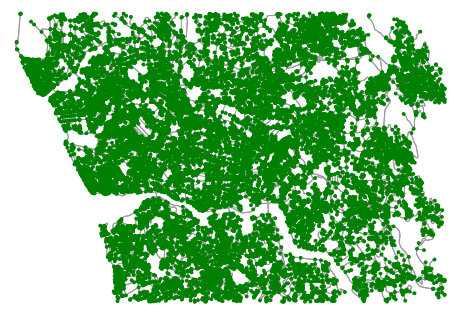

--- 12.902473449707031 seconds ---


In [6]:
startTime = time.time()
ox.plot_graph(G, figsize = (8, 8), bgcolor = '#FFFFFF', node_color = 'g')
print("--- %s seconds ---" % (time.time() - startTime))

Save the road network to disk as GraphML file for easy future reference.

In [7]:
ox.io.save_graphml(G, filepath = 'porto.graphml')

Method 2: Download Portugal Porto city's road network by using the city's name

In [12]:
#
# Source: https://github.com/cyang-kth/fmm/blob/master/example/osmnx_example/download_network.ipynb
# with customization
#
startTime = time.time()
place     = "Porto, Portugal"
G         = ox.graph_from_place(place, network_type = 'drive', which_result = 2)
# comment out as explained above, it is not required at the moment
#save_graph_shapefile_directional(G, filepath = 'portoNetCity')
print("--- %s seconds ---" % (time.time() - startTime))

C:\ProgramData\Anaconda3\lib\site-packages\osmnx\utils_geo.py:335: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
C:\ProgramData\Anaconda3\lib\site-packages\osmnx\utils_geo.py:426: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
C:\ProgramData\Anaconda3\lib\site-packages\osmnx\utils_geo.py:426: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:


--- 188.52243375778198 seconds ---


To verify the download is successful, the downloaded graph, G, is plotted.

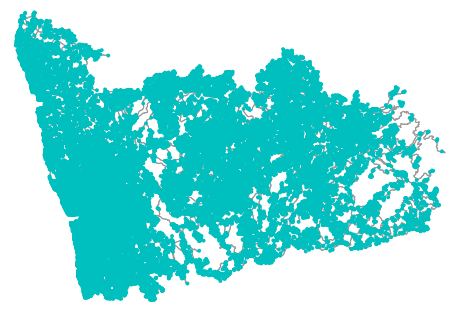

--- 50.50821232795715 seconds ---


In [16]:
startTime = time.time()
ox.plot_graph(G, figsize = (8, 8), bgcolor = '#FFFFFF', node_color = 'c')
print("--- %s seconds ---" % (time.time() - startTime))

Method 3: Download Portugal Porto city's road network using a boundary polygon in GeoJSon format

To get the Porto administrative boundaries in GeoJSon format, please following the instructions given by:<br>
https://peteris.rocks/blog/openstreetmap-administrative-boundaries-in-geojson/<br>
After you have downloaded the GeoJSon file, save it to a known location.<br>
Modify the below code snipet to point the json_file filepath to that saved location.

In [4]:
#
# Source: https://github.com/cyang-kth/fmm/blob/master/example/osmnx_example/download_network.ipynb
# with customization
#
startTime        = time.time()
json_file        = open("Porto.geojson", encoding = "utf8") # <<-- modify the filepath
data             = json.load(json_file)
boundary_polygon = shape(data["features"][0]['geometry'])
G                = ox.graph_from_polygon(boundary_polygon, network_type = 'drive')
# comment out as explained above, it is not required at the moment
#save_graph_shapefile_directional(G, filepath = 'portoNetBoundaryJson')
print("--- %s seconds ---" % (time.time() - startTime))

C:\ProgramData\Anaconda3\lib\site-packages\osmnx\utils_geo.py:335: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
C:\ProgramData\Anaconda3\lib\site-packages\osmnx\utils_geo.py:426: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
C:\ProgramData\Anaconda3\lib\site-packages\osmnx\utils_geo.py:426: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:


--- 176.13488507270813 seconds ---


To verify the download is successful, the downloaded graph, G, is plotted.

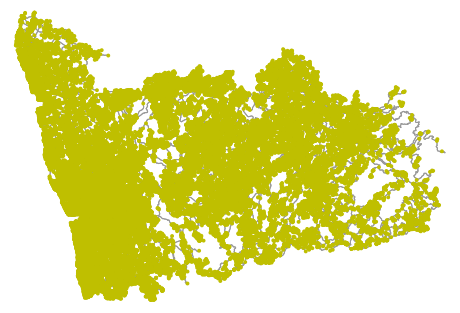

--- 48.803351402282715 seconds ---


In [5]:
startTime = time.time()
ox.plot_graph(G, figsize = (8, 8), bgcolor = '#FFFFFF', node_color = 'y')
print("--- %s seconds ---" % (time.time() - startTime))

Provide basic descirptive geometric and topological measures of the graph.

In [10]:
stats = ox.basic_stats(G)

In [11]:
stats

{'n': 76759,
 'm': 182688,
 'k_avg': 4.76004116781094,
 'edge_length_total': 24412528.736,
 'edge_length_avg': 133.6296239271326,
 'streets_per_node_avg': 2.684988079573731,
 'streets_per_node_counts': {0: 0,
  1: 14556,
  2: 431,
  3: 56719,
  4: 4812,
  5: 172,
  6: 69},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.189632486092836,
  2: 0.005614976745397934,
  3: 0.7389231230214046,
  4: 0.0626897171667166,
  5: 0.0022407795828502195,
  6: 0.0008989173907945648},
 'intersection_count': 62203,
 'street_length_total': 13355277.517000005,
 'street_segment_count': 103049,
 'street_length_avg': 129.60123355879247,
 'circuity_avg': 1.1115844728879225,
 'self_loop_proportion': 0.0035420042892216324}

#### Task 1: - Import the 1st 1000 trajectory data of taxies in Porto city

Download the trajectory data from Kaggle:<br>
https://www.kaggle.com/c/pkdd-15-predict-taxi-service-trajectory-i/data<br>
Description of the data is detailed on Kaggle.<br>
After downloading the train.csv zip file (533.6MB), unzip it in a known location.<br>
The first 1000 trips of taxi service in train.csv will be imported into the system for analysis.<br>
The imported data is called train-1000.

In [4]:
# import 1000 taxi trajectory dataset
dfTaxiTraj = pd.read_csv('./data/train.csv', nrows = 1000)
dfTaxiTraj = pd.DataFrame(dfTaxiTraj)

A summary of statistics pertaining to the imported data.

In [8]:
dfTaxiTraj.describe()

,TRIP_ID,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP
count,1.000000e+03,267.000000,428.000000,1.000000e+03,1.000000e+03
mean,1.372657e+18,26591.970037,30.696262,2.000036e+07,1.372657e+09
std,9.541115e+12,20152.793887,18.391304,2.055703e+02,9.541115e+03
min,1.372637e+18,2001.000000,1.000000,2.000000e+07,1.372637e+09
25%,1.372649e+18,8284.000000,15.000000,2.000018e+07,1.372649e+09
50%,1.372660e+18,21482.000000,26.000000,2.000037e+07,1.372660e+09
75%,1.372665e+18,44169.000000,51.250000,2.000052e+07,1.372665e+09
max,1.372670e+18,63882.000000,63.000000,2.000090e+07,1.372670e+09


First 5 rows of the imported data.

In [7]:
dfTaxiTraj.head(5)

,TRIP_ID,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,DAY_TYPE,MISSING_DATA,POLYLINE
0,1372636858620000589,C,NaN,NaN,20000589,1372636858,A,False,"[[-8.618643,41.141412],[-8.618499,41.141376],[..."
1,1372637303620000596,B,NaN,7.0,20000596,1372637303,A,False,"[[-8.639847,41.159826],[-8.640351,41.159871],[..."
2,1372636951620000320,C,NaN,NaN,20000320,1372636951,A,False,"[[-8.612964,41.140359],[-8.613378,41.14035],[-..."
3,1372636854620000520,C,NaN,NaN,20000520,1372636854,A,False,"[[-8.574678,41.151951],[-8.574705,41.151942],[..."
4,1372637091620000337,C,NaN,NaN,20000337,1372637091,A,False,"[[-8.645994,41.18049],[-8.645949,41.180517],[-..."
